In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Input data - Of the form [X value, Y value, Bias term]
X = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [5]:
#Associated output labels - First 2 examples are labeled '-1' and last 3 are labeled '+1'
y = np.array([-1,-1,1,1,1])

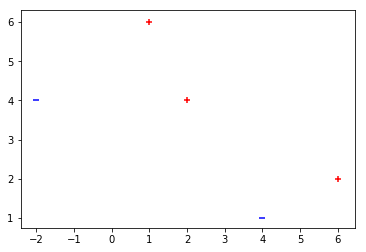

In [18]:
# Visulizing the data points
for d, sample in enumerate(X):
    if(y[d] < 0):
        plt.scatter(sample[0], sample[1],color = 'blue' , marker = '_')
    else:
        plt.scatter(sample[0], sample[1], color = 'red', marker = '+')
# plt.show()

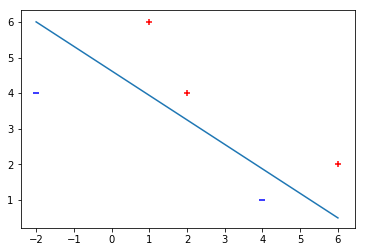

In [21]:
# Plotting a possible hyper plane
for d, sample in enumerate(X):
    if(y[d] < 0):
        plt.scatter(sample[0], sample[1],color = 'blue' , marker = '_')
    else:
        plt.scatter(sample[0], sample[1], color = 'red', marker = '+')
        
# Hyper plane
plt.plot([-2,6],[6,0.5])